<a href="https://colab.research.google.com/github/Exafto/-2025---4-/blob/main/%CE%95%CE%BE%CE%B1%CF%86%CF%84%CF%8C%CF%80%CE%BF%CF%85%CE%BB%CE%BF%CF%82_%CE%86%CE%B3%CE%B3%CE%B5%CE%BB%CE%BF%CF%82_(%CE%91%CE%95%CE%9C_4635)_AI_4%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [ ]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [ ]:
rows = 5
digits_per_row = 5

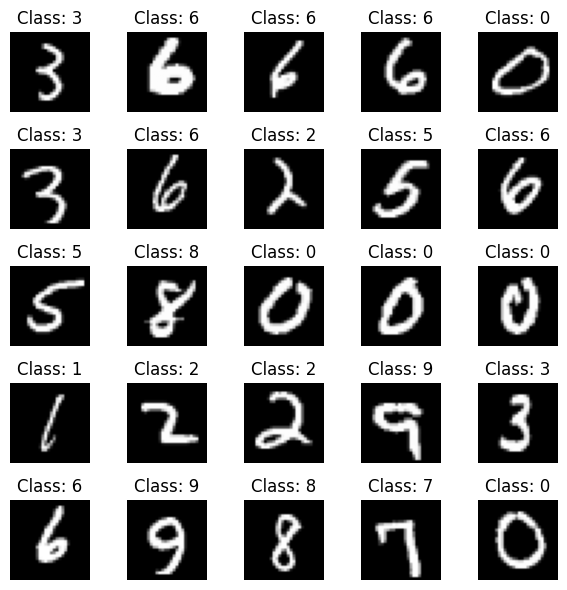

In [ ]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [ ]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [ ]:
#activation = 'tanh' #default
activation = 'relu'

loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']

learning_rate = 0.001 #default
#learning_rate = 0.1 #1st experiment
#learning_rate = 0.0001 #2nd experiment

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.

#epochs = 10 #default
#epochs = 20
epochs = 15

In [ ]:
'''
#default
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
'''

'''
#Testing for 1 hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
'''

'''
#Testing for 4 hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-4'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
'''

'''
#3 layers, 128 neurons each
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
'''

#2 layers, 512 neurons each
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])

'''
#1 layer with 32 neurons. Intentonally few for error checking
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=32, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
'''

model.summary(expand_nested=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8580 - loss: 5.2424 - val_accuracy: 0.9322 - val_loss: 0.3905
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9573 - loss: 0.2155 - val_accuracy: 0.9469 - val_loss: 0.2982
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9778 - loss: 0.0837 - val_accuracy: 0.9505 - val_loss: 0.2634
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9886 - loss: 0.0390 - val_accuracy: 0.9566 - val_loss: 0.2460
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9952 - loss: 0.0181 - val_accuracy: 0.9579 - val_loss: 0.2435
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9983 - loss: 0.0090 - val_accuracy: 0.9602 - val_loss: 0.2377
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.9616 - val_loss: 0.2332
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9998 - loss: 0

# Display Loss and Accuracy per Training Epoch

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

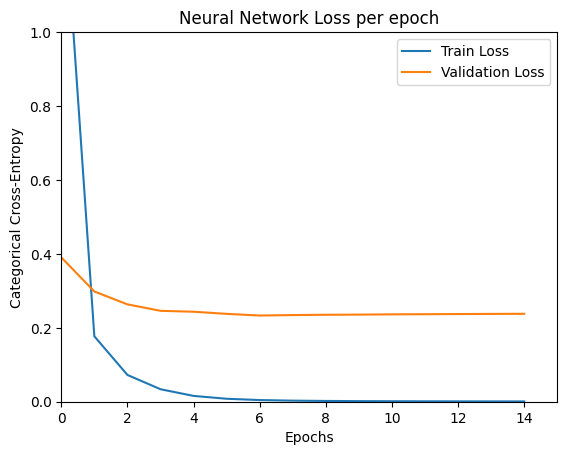

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

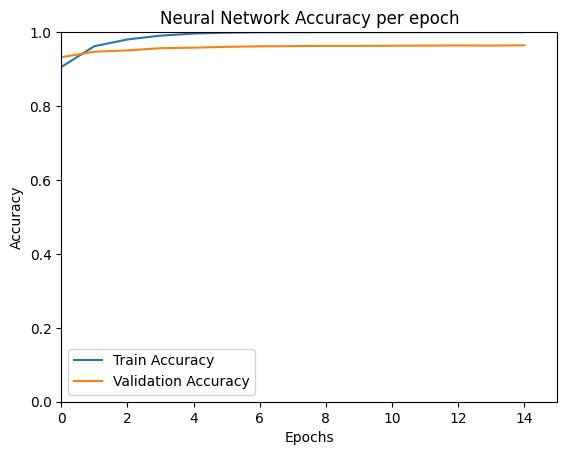

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


Θα μεταβληθούν οι παράμετροι που αναφέρονται στην εκφώνηση: αριθμός επιπέδων,  πλήθος Νευρώνων ανά επίπεδο, ρυθμός μάθησης, εποχές και συνάρτηση
ενεργοποίησης. Ο κώδικας για αυτές τις αλλαγές θα βρίσκεται σε σχόλια στα παραπάνω κελιά. Σε αυτό το κελί θα αναφερθούν μόνο οι τιμές που δοκίμασα. **Η λογική πίσω από την επιλογή τιμών, καθώς και ο πίνακας με τα αποτελέσματα θα δίνονται στο readme αρχείο του github repository.** Εκτός και αν αναφέρεται ρητά, κάθε φορά που αλλάζει μία παράμετρος, όλες οι υπόλοιπες μένουν σταθερές στην προκαθορισμένη τιμή τους.




*   Αριθμός κρυφών επιπέδων: Δοκιμάζουμε 1 και 4 κρυφά επίπεδα. Και τα δύο ρίχνουν την απόδοση, το default των 2 επιπέδων λειτουργεί καλύτερα.
*   Αριθμός νευρώνων ανά επίπεδο: Δοκιμάζουμε 3 επίπεδα των 128 νευρώνων και 2 επίπεδα των 512 νευρώνων. Ο δεύτερος συνδυασμός έχει σημαντική βελτίωση στην ακρίβεια.
*   Ρυθμός μάθησης: Δοκιμάζουμε τις τιμές 0.1 και 0.0001, διατηρώντας τη δομή των 2 επιπέδων των 512 νευρώνων. Και τα δύο είναι εξίσου αναποτελεσματικά.
*   Εποχές: Δοκιμάζουμε 20 εποχές για ρυθμό μάθησης 0.001, η βελτίωση στο τέλος είναι υπερβολικά μικρή.
*   Συνάρτηση ενεργοποίησης: Ο συνδυασμός της παραπάνω γνώσης, μαζί με τη συνάρτηση ReLU επιφέρουν το βέλτιστο αποτέλεσμα.



## 2. Validation: Show 1 misclassified digit from each class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


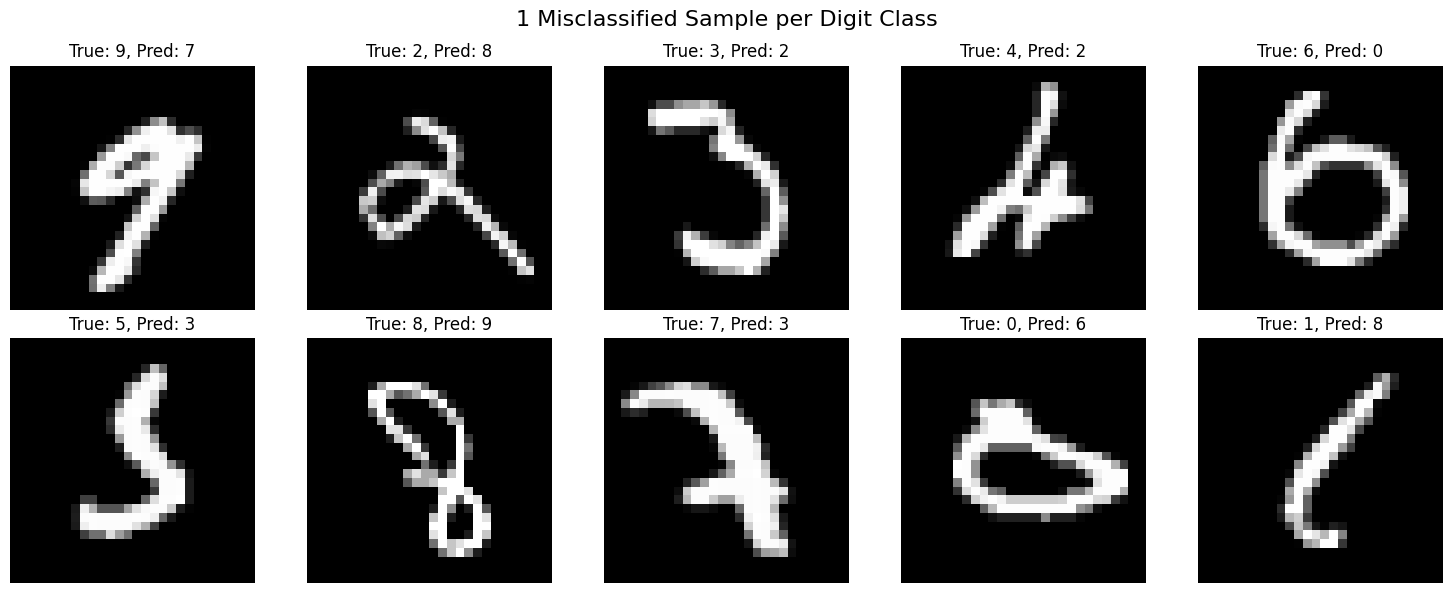

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_test = tf.argmax(y_test, axis=1).numpy()

misclassified_idxs = np.where(y_pred != y_test)[0]

seen_labels = []
examples = []

for idx in misclassified_idxs:
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    if true_label not in seen_labels:
        examples.append((x_test[idx], true_label, pred_label))
        seen_labels.append(true_label)

    if len(seen_labels) == 10:
        break

plt.figure(figsize=(15, 6))
for i, (img, true, pred) in enumerate(examples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f'True: {true}, Pred: {pred}')
    plt.axis('off')
plt.suptitle('1 Misclassified Sample per Digit Class', fontsize=16)
plt.tight_layout()
plt.show()

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

3 απλοί τρόποι να βελτιώσουμε την ακρίβεια του μοντέλου μας είναι:


*   **Shuffling:** Σε κάθε εποχή της εκπαίδευσης, "ανακατεύουμε" τα δεδομένα στο train set, ώστε να μην προασρμόζεται το μοντέλο στη σειρά των data. Έτσι, αποφεύγεται η σύγχιση που προκαλούν τυχόν batches στα δεδομένα (π.χ. όλα τα 7 να βρίσκονται στην αρχή).
*   **Normalization:** Κανονικοποιούμε τα δεδομένα, ώστε αυτά να βρίσκονται στο διάστημα [0,1]. Έτσι η εκπαίδευση είναι γρήγορη και ευσταθής. Επιπλέον αποφεύγονται τα exploding gradients.
*   **Autoencoders:** Μια άλλη τεχνική που θα μπορούσε να χρησιμοποιηθεί είναι οι autoencoders. Έτσι, το Βαθύ Νευρωνικό μας θα είχε καλύτερη αντοχή στον θόρυβο και θα μάθαινε να εστιάζει στα σημαντικότερα χαρακτηριστικά της εισόδου. Επίσης, η εκπαίδευση θα ήταν ευκολότερη (λόγω της μικρής διάστασης στα δεδομένα).



## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

[Github repository link](https://github.com/Exafto/-2025---4-.git)

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow
!pip freeze > requirements.txt

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
